Nama : Amin Fadilah </br>
NIM : 195150201111035

In [ ]:
# import library yang diperlukan
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Membaca dan mengcopy ke dataframe

main_df = pd.read_csv('marketing_campaign.csv', sep="\t")
df = main_df.copy()
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### EDA

In [ ]:
# cek ukuran data

df.shape

(2240, 29)

In [ ]:
# Menemukan informasi data dari setiap kolom

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Melihat data unik dari setiap kolom

df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

* Dari data diatas didapatkan bahwa kolom "Z_CostContact" dan "Z_Revenue" hanya memiliki 1 unik data sehingga tidak berpengaruh terhadap pemrosesan data nanti, kita dapat menghapus kolom tersebut

**Data Preparation**

In [ ]:
# mengecek data yang kosong

df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

* Kolom Income memiliki missing value data, sehingga kita dapat isi dengan nilai rata-rata pada nilai data kolom tersebut 

In [ ]:
# Menghapus kolom "Z_CostContact", "Z_Revenue" karena tidak berpengaruh pada clustering data nanti

df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [ ]:
# Isi missing value pada kolom Income

df['Income'] = df['Income'].fillna(df['Income'].mean())
df.isna().any() 

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [ ]:
# Cek data unik pada kolom "Marital_Status"

df['Marital_Status'].value_counts()  

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

* Gabungkan nilai data 'Married', 'Together' menjadi "relationship" agar data tidak terlalu kompleks
* Begitu juga 'Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd' menjadi "Single"

In [ ]:
# Jumlah data unik kolom 'Marital_Status' setelah diperbarui

df['Marital_Status'].value_counts()  

relationship    1444
Single           796
Name: Marital_Status, dtype: int64

In [ ]:
# Menggabungkan beberapa kolom yang mirip untuk mengurangi dimensi

df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [ ]:
# Hapus kolom yang sudah di merge tadi

col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,5524,1957,Graduation,Single,58138.0,04-09-2012,58,0,0,1617,1,25
1,2174,1954,Graduation,Single,46344.0,08-03-2014,38,0,2,27,0,6
2,4141,1965,Graduation,relationship,71613.0,21-08-2013,26,0,0,776,0,21
3,6182,1984,Graduation,relationship,26646.0,10-02-2014,26,0,1,53,0,8
4,5324,1981,PhD,relationship,58293.0,19-01-2014,94,0,1,422,0,19


In [ ]:
# Menambahkan kolom "Age" menggunakan perhitungan tahun sekarang dikurangi kolom "Year_Birth"

df['Age'] = 2021 - df["Year_Birth"]

In [ ]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [ ]:
# pada kolom Education nilai data dapat di merge menjadi 'PG' untuk kolom 'PhD','2n Cycle','Graduation', 'Master', dan 'UG untuk 'Basic'

df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'PG')  
df['Education'] = df['Education'].replace(['Basic'], 'UG')

In [ ]:
# Menghitung hari bekerja di perusahaan dengan bantuan kolom 'Dt_Customer' dan 'first_day'
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer)
df['first_day'] = '01-01-2015'
df['first_day'] = pd.to_datetime(df.first_day)
df['day_engaged'] = (df['first_day'] - df['Dt_Customer']).dt.days

In [ ]:
df=df.drop(columns=["ID", "Dt_Customer", "first_day", "Year_Birth", "Dt_Customer", "Recency", "Complain"],axis=1)
df.shape

(2240, 9)

In [ ]:
df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,PG,Single,58138.0,0,1617,1,25,64,997
1,PG,Single,46344.0,2,27,0,6,67,151
2,PG,relationship,71613.0,0,776,0,21,56,498
3,PG,relationship,26646.0,1,53,0,8,37,91
4,PG,relationship,58293.0,1,422,0,19,40,347


In [24]:
cate = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        cate.append(i)

print(cate)

['Education', 'Marital_Status']


In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [26]:
df['Marital_Status'].value_counts()

relationship    1444
Single           796
Name: Marital_Status, dtype: int64

In [27]:
#Mengubah data kategori ke numerik untuk setiap kolom
lbl_encode = LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

In [28]:
df1 = df.copy()

In [29]:
# Agar data mudah diproses dijadikan nilai rata-rata pada kolom 0 dan standar deviasi 1
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

In [30]:
scaled_features_df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,-0.157171,-1.346874,0.235327,-1.264505,1.679417,0.621248,1.320826,0.985345,1.976745
1,-0.157171,-1.346874,-0.235826,1.396361,-0.961275,-0.501912,-1.154596,1.235733,-1.667011
2,-0.157171,0.742460,0.773633,-1.264505,0.282673,-0.501912,0.799685,0.317643,-0.172468
3,-0.157171,0.742460,-1.022732,0.065928,-0.918094,-0.501912,-0.894025,-1.268149,-1.925433
4,-0.157171,0.742460,0.241519,0.065928,-0.305254,-0.501912,0.539114,-1.017761,-0.822831


In [53]:
df.to_csv("data_preprocessing.csv", index=False)

# Training Algoritma K-Means

In [31]:
# Training menggunakan algoritma K-Means
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3, random_state=42).fit(scaled_features_df)
pred=kmeans.predict(scaled_features_df)
df['cluster'] = pred + 1

In [33]:
scaled_features_df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,-0.157171,-1.346874,0.235327,-1.264505,1.679417,0.621248,1.320826,0.985345,1.976745
1,-0.157171,-1.346874,-0.235826,1.396361,-0.961275,-0.501912,-1.154596,1.235733,-1.667011
2,-0.157171,0.742460,0.773633,-1.264505,0.282673,-0.501912,0.799685,0.317643,-0.172468
3,-0.157171,0.742460,-1.022732,0.065928,-0.918094,-0.501912,-0.894025,-1.268149,-1.925433
4,-0.157171,0.742460,0.241519,0.065928,-0.305254,-0.501912,0.539114,-1.017761,-0.822831


### Clustering 

[]

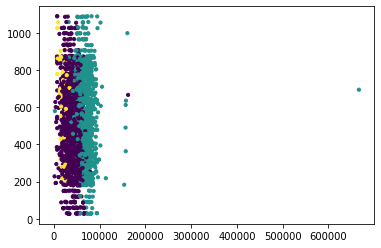

In [52]:
plt.scatter(df['Income'],df['day_engaged'],c=pred, alpha=1, s=10)
plt.plot()

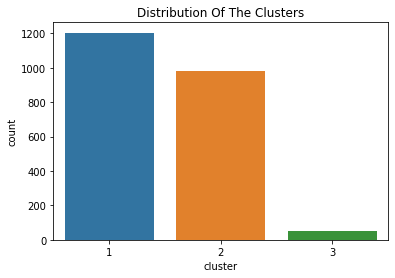

In [48]:
pl = sns.countplot(x=df["cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [46]:
from sklearn.metrics import silhouette_score 
silhouette_scores = []
m1=KMeans(n_clusters=3, random_state=42)
c = m1.fit_predict(scaled_features_df)
silhouette_scores.append(silhouette_score(scaled_features_df, m1.fit_predict(scaled_features_df))) 


# Hasil Silhouette Score

In [47]:
print(silhouette_scores)

[0.2633691981378332]


# Hasil Evaluasi
1. Hasil tidak bagus, karena algoritma K-means belum terlalu dapat mengenali data yang diolah atau data yang diproses tidak cocok dengan modelling klasterisasi.
2. Diperlukan data preprocessing yang matang dan pemilihan algoritma yang tepat untuk dapat mengklasterisasi data dengan maksimal